In [1]:
import json

In [2]:
%%writefile account.json
{
    "id":"shpimit",
    "pw":"Prugio#01"
}

Overwriting account.json


In [3]:
with open('account.json') as f:
    account = json.load(f)

In [12]:
from selenium import webdriver

driver = webdriver.Chrome()

In [13]:
driver.get('https://nid.naver.com/nidlogin.login')

In [14]:
driver.find_element_by_name('id').clear()
driver.find_element_by_name('pw').clear()
driver.find_element_by_name('id').send_keys(account['id'])
driver.find_element_by_name('pw').send_keys(account['pw'])

In [7]:
driver.find_element_by_css_selector('#id').clear()
driver.find_element_by_css_selector('#pw').clear()
driver.find_element_by_css_selector('#id').send_keys(account['id'])
driver.find_element_by_css_selector('#pw').send_keys(account['pw'])

In [8]:
driver.find_element_by_xpath('//input[@name="id"]').clear()
driver.find_element_by_xpath('//input[@name="pw"]').clear()
driver.find_element_by_xpath('//input[@name="id"]').send_keys(account['id'])
driver.find_element_by_xpath('//input[@name="pw"]').send_keys(account['pw'])

In [9]:
driver.find_element_by_id('id').clear()
driver.find_element_by_id('pw').clear()
driver.find_element_by_id('id').send_keys(account['id'])
driver.find_element_by_id('pw').send_keys(account['pw'])

In [10]:
driver.find_element_by_xpath('//input[@title="로그인"]')

<selenium.webdriver.remote.webelement.WebElement (session="56250646b086dee3d94d497d7ceab931", element="0.5641835478288746-3")>

In [15]:
driver.find_element_by_class_name('btn_global').click()

# Cookie & Session으로 가져오는 법

In [16]:
import requests
header = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36'}

In [17]:
def getDownload(url, param = None, retries = 3):
    resp = None
    try:
        resp = requests.get(url, params = param, headers = header)
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        if 500 <= resp.status_code < 600 and retries > 0:
            print('Retries : {0}'.format(retries))
            return getDownload(url, param, retries -1)
        else:
            print(resp.status_code)
            print(resp.reason)
            print(resp.request.headers)
            
    return resp

In [18]:
from selenium import webdriver

driver = webdriver.Chrome()

In [19]:
driver.get_cookies()

[{'domain': 'www.naver.com',
  'expiry': 1556187277.33829,
  'httpOnly': True,
  'name': 'PM_CK_loc',
  'path': '/',
  'secure': False,
  'value': '7223d4b476633674770857d8b627f37c90f64c66feaefbd3f4a4a9b546189438'},
 {'domain': '.naver.com',
  'httpOnly': False,
  'name': 'NID_JKL',
  'path': '/',
  'secure': True,
  'value': 'I8WH77XDKOvKnVsokAFEa/lU9qSYZ3K89HqaSfngGpY='},
 {'domain': '.naver.com',
  'expiry': 2524640398.33494,
  'httpOnly': False,
  'name': 'NNB',
  'path': '/',
  'secure': False,
  'value': 'C2USWNAQG7AFY'},
 {'domain': '.naver.com',
  'expiry': 3134024081.784718,
  'httpOnly': False,
  'name': 'npic',
  'path': '/',
  'secure': False,
  'value': 'NAFIMPDUmchoXnhOToOgDZFXjcbRF4wHulkmE77UDMm4YXmr20SYo0I88wzvBTNWCA=='},
 {'domain': '.naver.com',
  'httpOnly': False,
  'name': 'nid_inf',
  'path': '/',
  'secure': False,
  'value': '1781347567'},
 {'domain': '.naver.com',
  'httpOnly': True,
  'name': 'NID_AUT',
  'path': '/',
  'secure': False,
  'value': 'oRGkB+8Gzrt

In [20]:
session = requests.Session()

In [21]:
for c in driver.get_cookies():
    print(c['name'], c['value'])
    session.cookies.set(c['name'], c['value'])

PM_CK_loc 7223d4b476633674770857d8b627f37c90f64c66feaefbd3f4a4a9b546189438
NID_JKL I8WH77XDKOvKnVsokAFEa/lU9qSYZ3K89HqaSfngGpY=
NNB C2USWNAQG7AFY
npic NAFIMPDUmchoXnhOToOgDZFXjcbRF4wHulkmE77UDMm4YXmr20SYo0I88wzvBTNWCA==
nid_inf 1781347567
NID_AUT oRGkB+8GzrtRnJYthQ5TK9EU4rIqhlgMJWlrYwKsfCOlv7QpG0JAclIFRGQVGnIw
NID_SES AAABd0aMBLJi0QcNqSqKn7UJYZbiNwbHXeP2XFNnsLIm/qrYFMhJh3Ju1D2e6H0ARI/qnekQvKD6fMF4NZr1ExWBfJz7b+N2Xbceodn3Gdh/EhvYPYXCPdwsmmmkGlDIy23vg/sn73SfT6+41PvNfvFqrw5r86HZwHfGU1eoG79t7E8PhmIkJxXr0PGNWC7kXESzF8Mv9R0naTeAgDzjMr1TEXDm3tgg+IDW5tC4rlwzQ0fmxcqipRf8A5CFB5S+cODrp4xQD2F5W7VI2J2UkXZvYl24FSeGwYHrkYTpTleWTq8WH1KKJZHab6J/wMV5qyZgnXOnmgvNhZpa5og/OsD2e86wAbufxCvelInZ0Orv3kD9SYurtpmHsMEqCRotQHDslWc2WpfJBkMwofAtpRfLm3J+0kmgXOPsTukz1Mmt+GeIJj+QigPOJhoDXl0nASIpNA9FVc2F3TLCqoPtXtkPTWgl46Wckx3elaGLg2fvUKCuO2EzKylSZnDz0smoBzpvzQ==


In [22]:
session.cookies.get_dict()

{'NID_AUT': 'oRGkB+8GzrtRnJYthQ5TK9EU4rIqhlgMJWlrYwKsfCOlv7QpG0JAclIFRGQVGnIw',
 'NID_JKL': 'I8WH77XDKOvKnVsokAFEa/lU9qSYZ3K89HqaSfngGpY=',
 'NID_SES': 'AAABd0aMBLJi0QcNqSqKn7UJYZbiNwbHXeP2XFNnsLIm/qrYFMhJh3Ju1D2e6H0ARI/qnekQvKD6fMF4NZr1ExWBfJz7b+N2Xbceodn3Gdh/EhvYPYXCPdwsmmmkGlDIy23vg/sn73SfT6+41PvNfvFqrw5r86HZwHfGU1eoG79t7E8PhmIkJxXr0PGNWC7kXESzF8Mv9R0naTeAgDzjMr1TEXDm3tgg+IDW5tC4rlwzQ0fmxcqipRf8A5CFB5S+cODrp4xQD2F5W7VI2J2UkXZvYl24FSeGwYHrkYTpTleWTq8WH1KKJZHab6J/wMV5qyZgnXOnmgvNhZpa5og/OsD2e86wAbufxCvelInZ0Orv3kD9SYurtpmHsMEqCRotQHDslWc2WpfJBkMwofAtpRfLm3J+0kmgXOPsTukz1Mmt+GeIJj+QigPOJhoDXl0nASIpNA9FVc2F3TLCqoPtXtkPTWgl46Wckx3elaGLg2fvUKCuO2EzKylSZnDz0smoBzpvzQ==',
 'NNB': 'C2USWNAQG7AFY',
 'PM_CK_loc': '7223d4b476633674770857d8b627f37c90f64c66feaefbd3f4a4a9b546189438',
 'nid_inf': '1781347567',
 'npic': 'NAFIMPDUmchoXnhOToOgDZFXjcbRF4wHulkmE77UDMm4YXmr20SYo0I88wzvBTNWCA=='}

In [67]:
from bs4 import BeautifulSoup

html = session.get('https://movie.naver.com/movie/point/af/list.nhn?&page=1')
dom = BeautifulSoup(html.text,"html.parser")

# print(dom)

# id는 #, class는 .
# for tag in dom.select('#old_content .point'):
for tag in dom.select('#old_content .movie'):
    print(tag.text)

# from urllib import parse
# import sys

어벤져스: 엔드게임
돈
어벤져스: 엔드게임
어벤져스: 엔드게임
어벤져스: 엔드게임
어벤져스: 엔드게임
어벤져스: 엔드게임
어벤져스: 엔드게임
어벤져스: 엔드게임
어벤져스: 엔드게임


In [37]:
for tag in dom.select("div.old_content"):
    print(tag)
    print(tag.find_parent().find_parent().find_parent().text[0])

#  강사님 소스

In [68]:
url = 'https://movie.naver.com/movie/point/af/list.nhn'
params = {
    'page':1
}

html = getDownload(url)
dom = BeautifulSoup(html.text, 'html.parser')

In [69]:
import pandas as pd

In [71]:
result = list()
for page in range(1, 1000+1):
    params['page'] = page
    html = getDownload(url, params)
    dom = BeautifulSoup(html.text, 'html.parser')

    title = [tag.text.split('\n')[1] for tag in dom.select('table.list_netizen td.title')]
    content = [tag.text.split('\n')[2] for tag in dom.select('table.list_netizen td.title')]
    point = [tag.text for tag in dom.select('table.list_netizen td.point')]

    pd_title = pd.DataFrame(title, columns=['제목'])
    pd_content = pd.DataFrame(content, columns=['리뷰'])
    pd_point = pd.DataFrame(point, columns=['평점'])
    pd_result = pd.concat([pd_title, pd_content, pd_point], axis=1)
    
    result.append(pd_result)
    
excel = pd.concat(result)
excel.to_csv('./movie/movie.csv', index=False)

In [73]:
data = pd.read_csv('./movie/movie.csv')

In [74]:
data.head()

,제목,리뷰,평점
0,어벤져스: 엔드게임,와 진짜 입틀막하면서 봤다,10
1,어벤져스: 엔드게임,고냥 레전드 그 자체 꼭 보세여,10
2,어벤져스: 엔드게임,마블 역사를 집대성한 화려한 피날레!,10
3,노무현과 바보들,"어벤저스와 맞짱뜨는 노짱 우리 대통령님!!지구는 어벤저스에게 맡기고 우리나라,우리 ...",10
4,어벤져스: 엔드게임,안보면 후회합니다. 절대 돈 아깝다는 생각 안해요.,10


In [75]:
data.count()

제목    10000
리뷰    10000
평점    10000
dtype: int64

In [76]:
data.groupby(["평점"]).count()

,제목,리뷰
평점,,
1,422,422
2,177,177
3,29,29
4,106,106
5,90,90
6,315,315
7,168,168
8,698,698
9,387,387


In [78]:
upperBound = 7
lowerBound = 5

data = data[data["평점"] < 10]
positive = data[data["평점"] > upperBound]
negative = data[data["평점"] < lowerBound]

In [79]:
len(positive), len(negative)

(1085, 734)

In [81]:
from collections import Counter, defaultdict
from konlpy.tag import Komoran

positiveDTM = defaultdict(Counter)
# Positive 1 => {"형태소/품사" = 횟수, "형태소/품사" = 횟수, "형태소/품사" = 횟수, ...}
# Negative 1 => {"형태소/품사" = 횟수, "형태소/품사" = 횟수, "형태소/품사" = 횟수, ...}
negativeDTM = defaultdict(Counter)

ma = Komoran()

for i, review in enumerate(positive["리뷰"]):
    posList = ma.pos(review) # => [[형태소, 품사], ]
    
    for term in posList: # => [형태소, 품사]
        if len(term[0]) > 1:
            positiveDTM[i]["/".join(term)] += 1 # => "형태소/품사"
            
for i, review in enumerate(negative["리뷰"]):
    posList = ma.pos(review)
    
    for term in posList:
        if len(term[0]) > 1:
            negativeDTM[i]["/".join(term)] += 1

In [82]:
positiveTDM = defaultdict(Counter)
negativeTDM = defaultdict(Counter)

for i, termList in positiveDTM.items():
    for term, freq in termList.items():
        positiveTDM[term][i] = freq

for i, termList in negativeDTM.items():
    for term, freq in termList.items():
        negativeTDM[term][i] = freq

In [83]:
positiveLexicon = list(set(positiveTDM.keys()))
negativeLexicon = list(set(negativeTDM.keys()))

positiveDocuments = list(positiveDTM.keys())
negativeDocuments = list(negativeDTM.keys())

In [84]:
from collections import defaultdict, Counter
# Counter는 빈돌별로 나열을 해준다.

positivePOS = defaultdict(Counter)
negativePOS = defaultdict(Counter)

for term in positiveLexicon:
    tokens = term.split("/")
    # "형태소/품사" -> tokens[0]:형태소(ex. 어/벤/저/스), tokens[1]:품사
    # TDM[term] => 어느 문서에서 몇 번, 
    
    positivePOS[tokens[-1]][tokens[0]] += sum(positiveTDM[term].values())
    # 명사 -> 단어1:positive 내 전체 등장횟수, 단어2:, 단어3:, ...
    
for term in negativeLexicon:
    tokens = term.split("/")
    
    negativePOS[tokens[-1]][tokens[0]] += sum(negativeTDM[term].values())

In [85]:
positivePOS.keys()

dict_keys(['NNP', 'SL', 'NNG', 'MAG', 'NA', 'VA', 'NP', 'XR', 'JKB', 'EC', 'VV', 'EF', 'JX', 'NNB', 'SN', 'SE', 'VX', 'ETM', 'MM', 'IC', 'XSA', 'MAJ', 'XSV', 'NR', 'EP', 'JKS', 'JC', 'VCN', 'XSN'])

In [86]:
positivePOS["NNG"].most_common()[:20]

[('영화', 195),
 ('마지막', 79),
 ('생각', 71),
 ('기대', 67),
 ('마무리', 46),
 ('느낌', 36),
 ('시간', 35),
 ('장면', 34),
 ('감동', 33),
 ('내용', 32),
 ('사람', 31),
 ('인피', 28),
 ('초반', 26),
 ('부분', 23),
 ('시작', 22),
 ('이해', 22),
 ('엄마', 22),
 ('최고', 22),
 ('중간', 21),
 ('마음', 20)]

In [87]:
ma.tagset

{'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ETM': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JKB': '부사격 조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JKV': '호격 조사',
 'JX': '보조사',
 'MAG': '일반 부사',
 'MAJ': '접속 부사',
 'MM': '관형사',
 'NA': '분석불능범주',
 'NF': '명사추정범주',
 'NNB': '의존 명사',
 'NNG': '일반 명사',
 'NNP': '고유 명사',
 'NP': '대명사',
 'NR': '수사',
 'NV': '용언추정범주',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SH': '한자',
 'SL': '외국어',
 'SN': '숫자',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'VA': '형용사',
 'VCN': '부정 지정사',
 'VCP': '긍정 지정사',
 'VV': '동사',
 'VX': '보조 용언',
 'XPN': '체언 접두사',
 'XR': '어근',
 'XSA': '형용사 파생 접미사',
 'XSN': '명사파생 접미사',
 'XSV': '동사 파생 접미사'}

In [88]:
negativePOS["NNG"].most_common()[:20]

[('영화', 191),
 ('평점', 46),
 ('내용', 34),
 ('시간', 32),
 ('기대', 28),
 ('사람', 27),
 ('마지막', 24),
 ('생각', 23),
 ('최악', 21),
 ('개연', 18),
 ('여자', 17),
 ('처음', 16),
 ('재미', 14),
 ('수준', 14),
 ('감동', 13),
 ('느낌', 13),
 ('감독', 12),
 ('진짜', 11),
 ('배우', 11),
 ('이상', 11)]

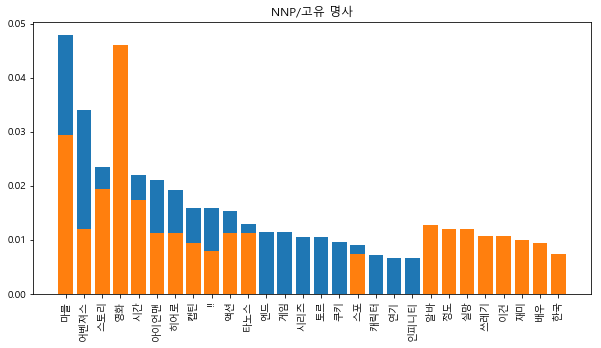

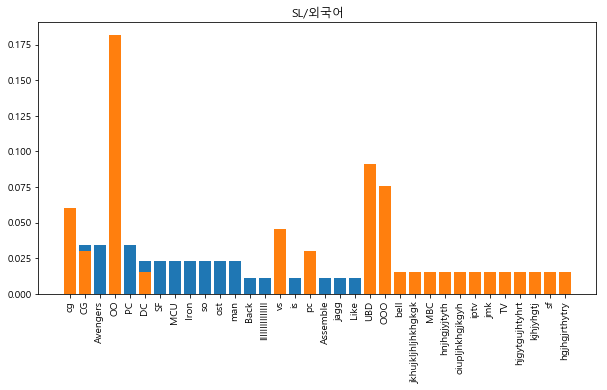

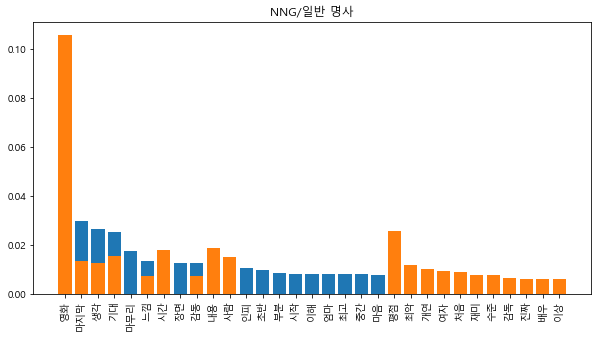

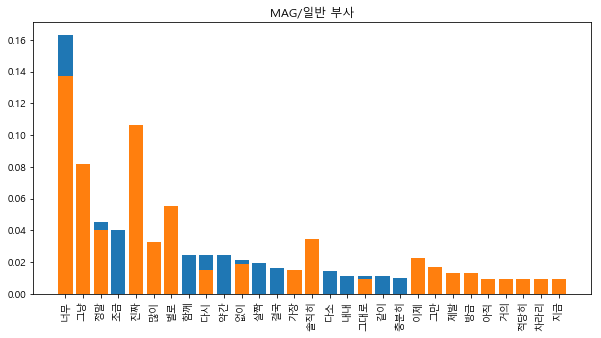

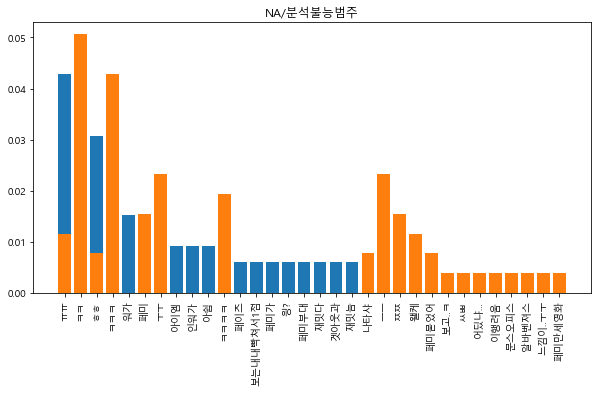

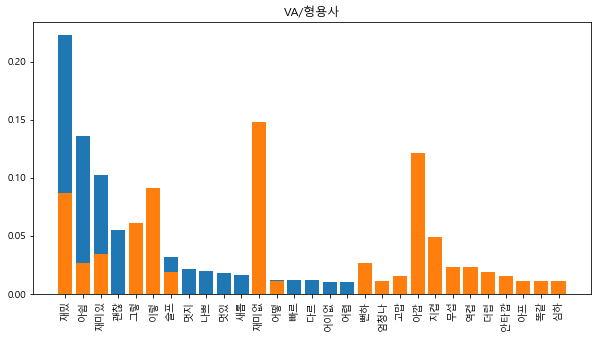

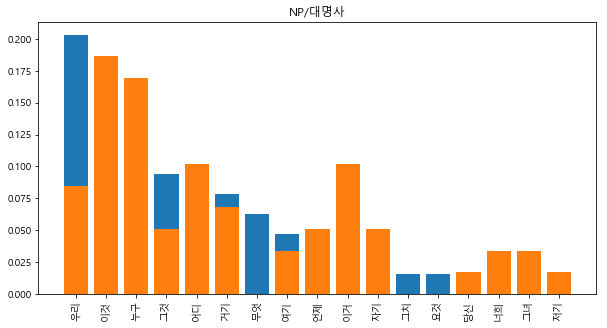

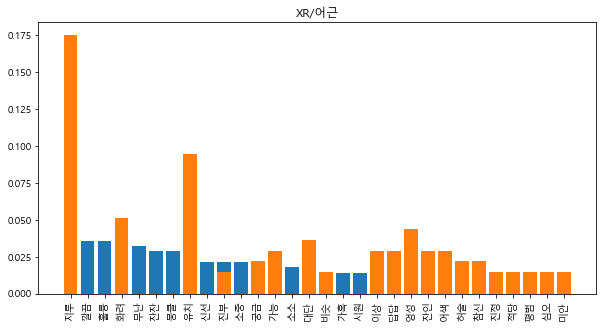

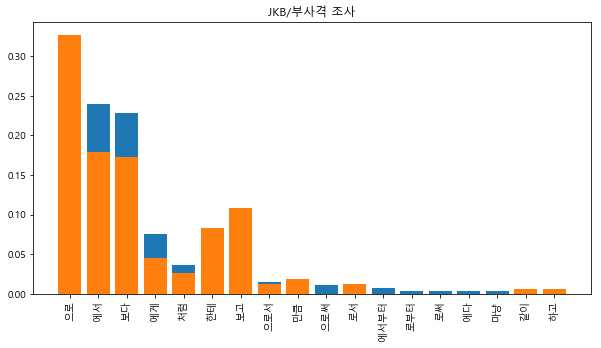

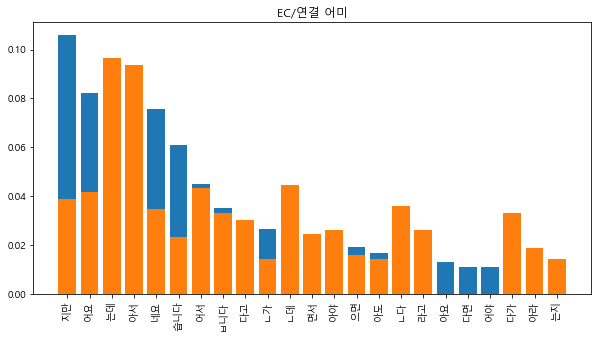

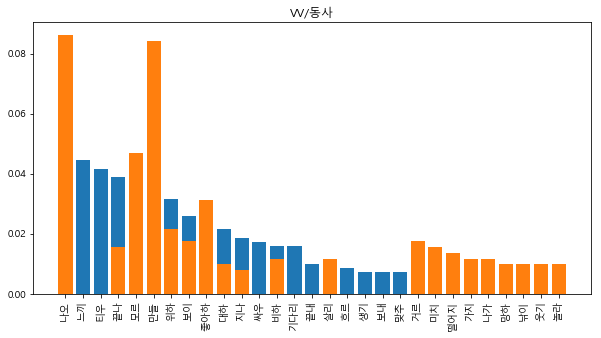

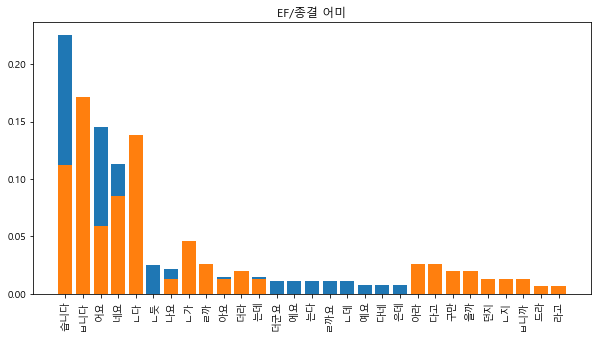

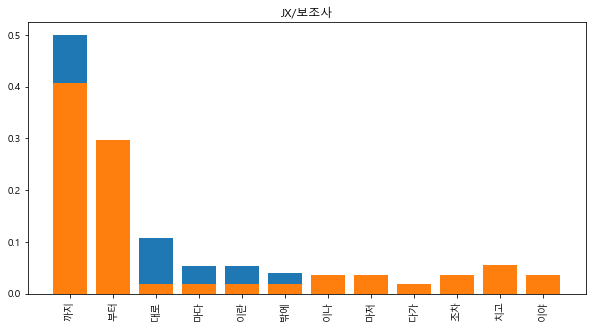

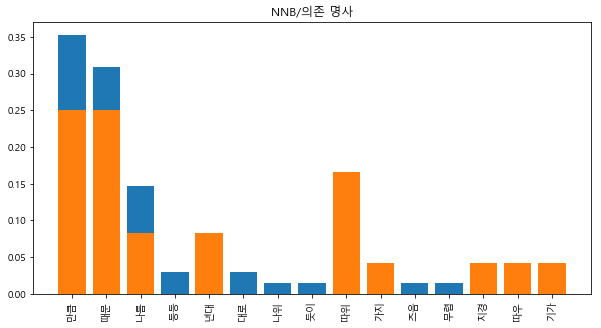

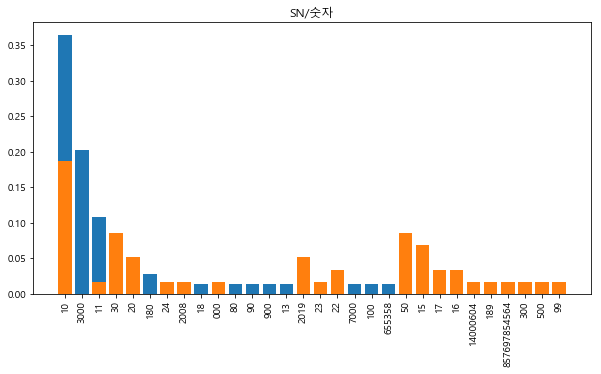

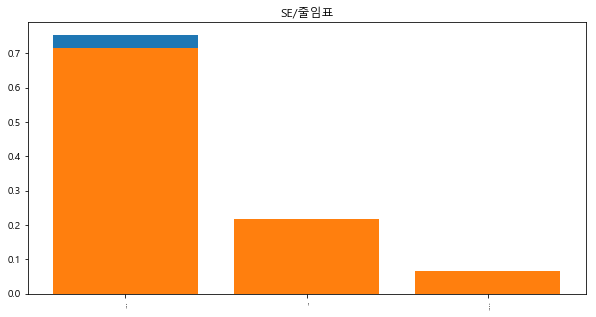

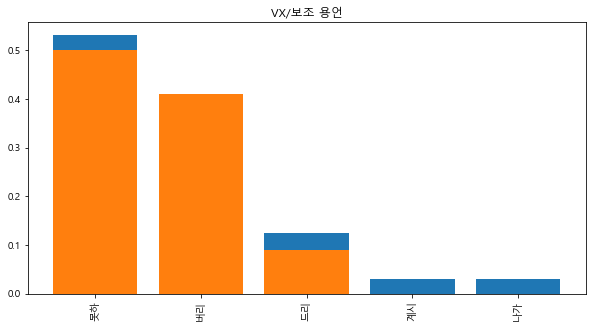

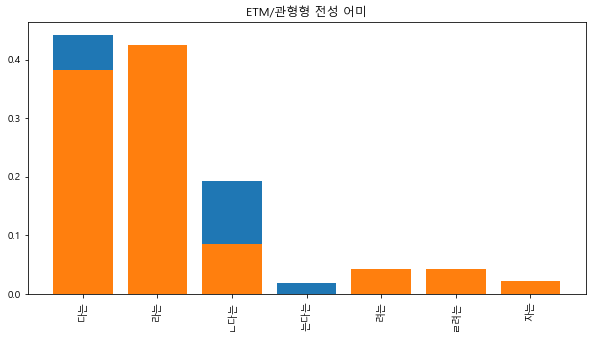

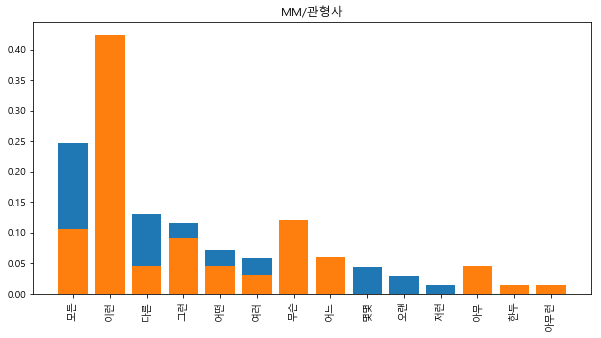

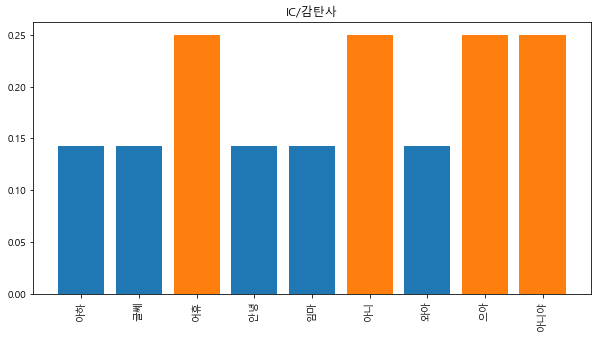

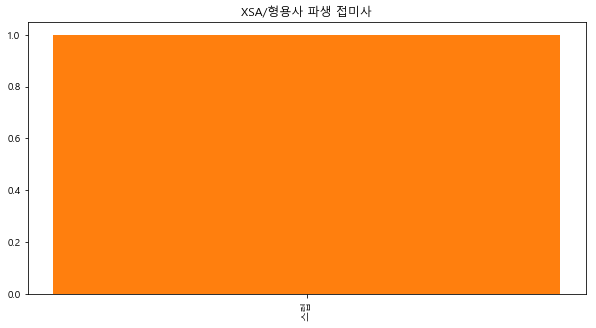

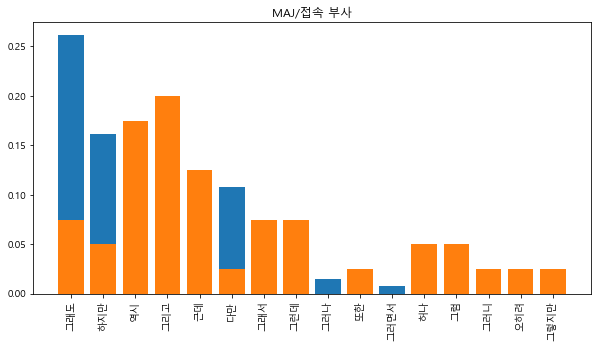

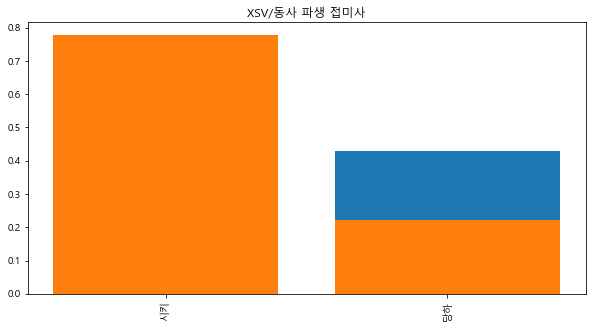

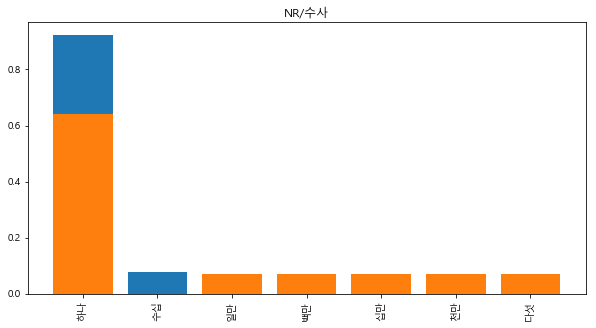

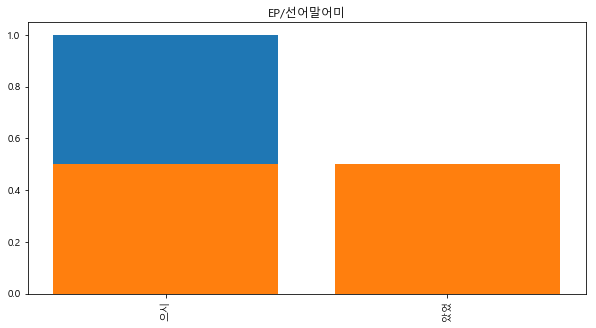

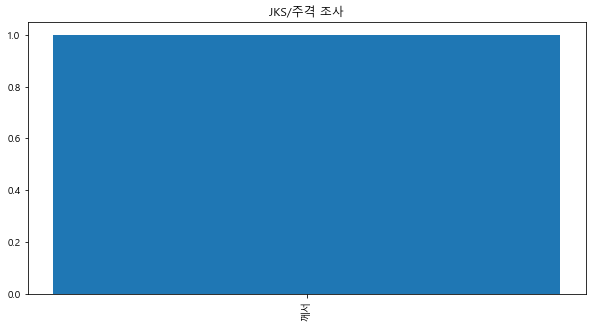

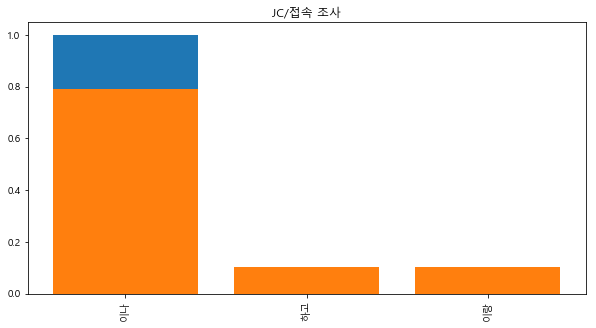

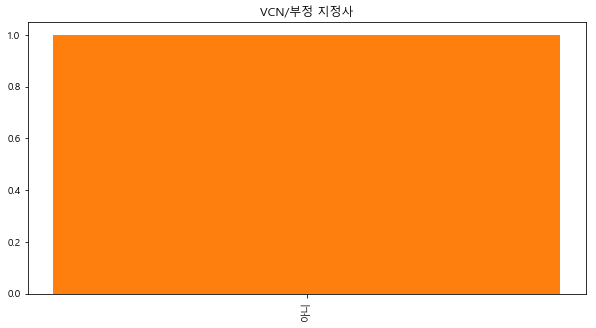

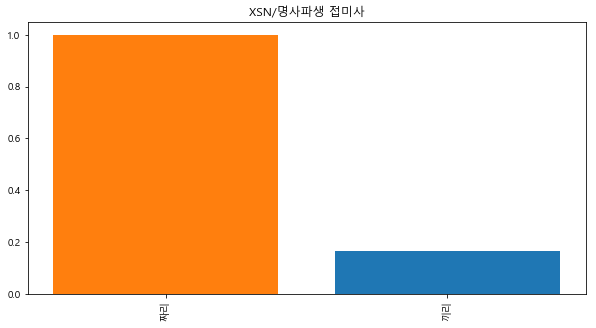

In [90]:
from konlpy.tag import Komoran
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

tagList = Komoran().tagset

# path = 'C:/Windows/Fonts/LG PC.ttf'
path = 'C:/Windows/Fonts/malgun.ttf'


family = font_manager.FontProperties(fname=path).get_name()
rc("font", family=family)
rc("figure", figsize=(10,5))

for posName in positivePOS.keys():
    pNorm = sum(positivePOS[posName].values())
    pTermList = [pair[0] for pair in positivePOS[posName].most_common()[:20]]
    pFreqList = [pair[1]/pNorm for pair in positivePOS[posName].most_common()[:20]]
    
    nNorm = sum(negativePOS[posName].values())
    nTermList = [pair[0] for pair in negativePOS[posName].most_common()[:20]]
    nFreqList = [pair[1]/nNorm for pair in negativePOS[posName].most_common()[:20]]
    
    plt.title("{0}/{1}".format(posName, tagList[posName]))
    plt.bar(pTermList, pFreqList, align="center")
    plt.bar(nTermList, nFreqList, align="center")
    plt.xticks(rotation=90)
    plt.show()

## PMI

In [91]:
from math import log

K = 0.1   # 0이 될수 있으니까 아주 작은 값을 더해준다
N = len(positiveDTM) + len(negativeDTM)

positivePMI = defaultdict(float)
positiveNPMI = defaultdict(float)

seedDocList = list(positiveDTM.keys())
seedLikelihood = len(seedDocList)/N

for term in list(set(positiveLexicon + negativeLexicon)):
    termDocList = list(positiveTDM[term].keys()) + list(negativeTDM[term].keys())
    termLikelihood = len(termDocList)/N

    jointLikelihood = (len(positiveTDM[term].keys()) + K)/N
    multiLikelihood = seedLikelihood * termLikelihood

    positivePMI[term] = log(jointLikelihood/multiLikelihood)
    positiveNPMI[term] = positivePMI[term]/-log(jointLikelihood)

In [92]:
# https://web.stanford.edu/class/cs124/lec/sentimentvideoslides2019.pptx

In [93]:
negativePMI = defaultdict(float)
negativeNPMI = defaultdict(float)

seedDocList = list(negativeDTM.keys())
seedLikelihood = len(seedDocList)/N

for term in list(set(positiveLexicon + negativeLexicon)):
    termDocList = list(positiveTDM[term].keys()) + list(negativeTDM[term].keys())
    termLikelihood = (len(termDocList) + K)/N

    jointLikelihood = (len(negativeTDM[term].keys()) + K)/N
    multiLikelihood = seedLikelihood * termLikelihood

    negativePMI[term] = log(jointLikelihood/multiLikelihood)
    negativeNPMI[term] = negativePMI[term]/-log(jointLikelihood)

In [94]:
pmiSO = defaultdict(float)
invertedPmiSO = defaultdict(float)

npmiSO = defaultdict(float)
invertedNpmiSO = defaultdict(float)

for term in list(set(positiveLexicon + negativeLexicon)):
    pmiSO[term.split("/")[0]] += positivePMI[term] - negativePMI[term]
    invertedPmiSO[term.split("/")[0]] -= positivePMI[term] - negativePMI[term]
    
    npmiSO[term.split("/")[0]] += positiveNPMI[term] - negativeNPMI[term]
    invertedNpmiSO[term.split("/")[0]] -= positiveNPMI[term] - negativeNPMI[term]

In [95]:
print(sorted(pmiSO.items(), key=lambda x:x[1], reverse=True)[:10])

print(sorted(npmiSO.items(), key=lambda x:x[1], reverse=True)[:10])

print(sorted(pmiSO.items(), key=lambda x:x[1], reverse=False)[:10])

print(sorted(npmiSO.items(), key=lambda x:x[1], reverse=False)[:10])

[('엄마', 7.392948072128328), ('완벽', 7.085649257479508), ('아들', 7.085649257479508), ('대로', 6.785587031222048), ('후반', 6.630405842829017), ('만족', 6.630405842829017), ('끝내', 6.4327163235177505), ('장식', 6.330276855797497), ('추억', 6.256941417413735), ('최선', 6.145554610116649)]
[('엄마', 0.8370010808900477), ('대로', 0.8159140077729463), ('완벽', 0.7963839505293595), ('아들', 0.7963839505293595), ('약간', 0.7500869435065087), ('후반', 0.74278391773159), ('만족', 0.74278391773159), ('끝내', 0.7210275682010031), ('아쉽', 0.71860981438096), ('장식', 0.7133096716895029)]
[('뇌물', -7.472611172167553), ('아야지', -7.339079779543031), ('사고', -7.184929099715772), ('좌파', -6.491781919155827), ('지도', -6.491781919155827), ('구만', -6.491781919155827), ('아라', -6.221029538718016), ('지구', -6.086316811047663), ('잘못', -6.086316811047663), ('바보', -6.086316811047663)]
[('뇌물', -0.8602900020207318), ('아야지', -0.8497188801393936), ('아라', -0.8281760343220128), ('사고', -0.824405222281108), ('유치', -0.7787851897012685), ('좌파', -0.741983540938236

In [98]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

path = 'C:/Windows/Fonts/malgun.ttf'

def drawCloud(words):
    wc = WordCloud(font_path=path, max_words=30, background_color="white")
    wc.generate_from_frequencies(words)
    plt.imshow(wc.to_array())
    plt.axis("off")
    plt.show()

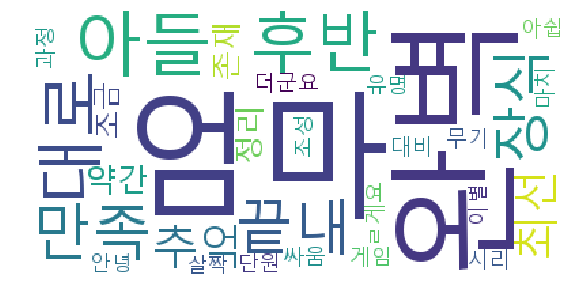

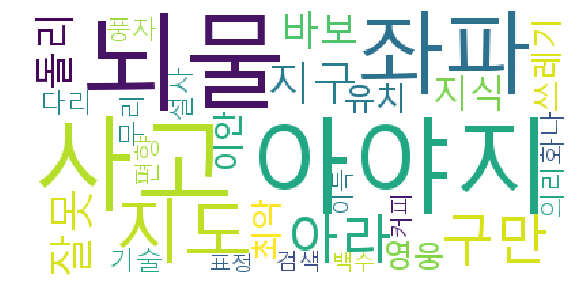

In [99]:
drawCloud(dict(sorted(pmiSO.items(), key=lambda x:x[1], reverse=True)[:30]))
drawCloud(dict(sorted(invertedPmiSO.items(), key=lambda x:x[1], reverse=True)[:30]))

In [100]:
# movieReview = "크리스찬 베일의 팬이라 봤는데 연기는 진짜 완벽했다.딕체니만 연구하고 파고든 이유를 충분히 보여줬다.911 이후 우리가 알지 못한 미국의 정치적 이야기가 흥미로웠다.이라크와 아프간 문제를 두고 대립하는 관료들의 설전은 실제로 보는 거처럼 리얼했다."
# movieReview = "영화보고 평점달긴 또 처음이네요...왜 이렇게 눈물이 나는지 모르겠네요ㅠ줄거리보다 마음이 느껴지는 한편의 인생을 보는것 같아요. 강추!!!"
# movieReview = "소리 내 울지 않았던 아버지가 펑펑 우는 그 순간, 영화의 절정이라는 것을 깨달았다. 감동이 휘몰아 치면서 영화에 동화되었다. 하지만 중간에 등장했던 떡밥들이 어중간하게 풀리면서 찜찜함을 남겨주기도 한다."

# movieReview = "말이 필요 없네요 기다린 만큼 재미나게 보고 왔습니다"
# movieReview = "초중반은 지루하고 마지막이 그나마 볼만함마블다른영화보다는 구성이 탄탄하지 않음"
movieReview = "영화라고하기엔;;드라마 스페셜 수준"
# movieReview = "왜 하필 이런 3류영화는 영화 소개부터 꼴통형사로 시작하냐 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ"
# movieReview = "ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 진짜 제목부터 보고싶지않은 영화는 처음이닼ㅋㅋㅋ"

posList = ma.pos(movieReview)
reviewTerms = list()
    
for term in posList:
    if len(term[0]) > 1:
        reviewTerms.append(term[0])

In [101]:
pmiScore = 0.0
npmiScore = 0.0

for term in reviewTerms:
    pmiScore += pmiSO[term]
    npmiScore += npmiSO[term]
    print(term, pmiSO[term], npmiSO[term])
    
if npmiScore > 0.1:
    print("Positive")
elif npmiScore < -0.1:
    print("Negative")
else:
    print("Neutral")

print(pmiScore, npmiScore)

영화 -1.0731592770742435 -0.357614682515675
라고 -3.112840758955025 -0.3956093328263137
드라마 스페셜 -2.6965848152438587 -0.3049975873594484
수준 -2.2180300650088727 -0.37014725928482783
Negative
-9.100614916282 -1.428368861986265


# 다시 시작

In [104]:
globalDTM = defaultdict(Counter)

In [107]:
for i, review in enumerate(data["리뷰"]):
    posList = ma.morphs(review)
    
    for term in posList:
        if len(term) > 1:
            globalDTM[i][term] += 1

In [108]:
globalTDM = defaultdict(Counter)

In [ ]:
for i, review in enumerate(data["리뷰"]):
    posList = ma.morphs(review)
    
    for term in posList:
        if len(term) > 1:
            globalTDM[i][term] += 1

In [102]:
pSeed = ["감동"]
nSeed = ["실망"]

In [109]:
from math import log

K = 0.1
N = len(globalDTM)

pGlobalPMI = defaultdict(float)
pGlobalNPMI = defaultdict(float)

seedDocList = list(globalTDM[pSeed[0]].keys())
seedLikeihood = len(seedDocList)/N

for term in globalLexicon:
    termDocList = list(globalTDM[term].keys())
    termLikelihood = len(termDocList) / N
    
    jointLikelihood = (len(set(seedDocList).intersection(termDocList))/ +K)/n
    
    multiLikelihood = seedLikelihood * termLikelihood

    pGlobalPMI[term] = log(jointLikelihood/multiLikelihood)
    pGlobalNPMI[term] = negativePMI[term]/-log(jointLikelihood)    

NameError: name 'globalLexicon' is not defined

## 명사만 뽑기

In [116]:
globalTDM = defaultdict(Counter)

for i, review in enumerate(data["리뷰"]):
    posList = ma.nouns(review)
    
    for term in posList:
        if len(term) > 1:
            globalTDM[i][term] += 1

In [117]:
globalLexicon = globalTDM.keys()

In [119]:
globalLexicon

dict_keys([0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 218, 219, 220, 221, 222, 223, 224, 225, 226, 228, 229, 230, 231, 232, 233

In [121]:
from math import log

K = 0.1   # 0이 될수 있으니까 아주 작은 값을 더해준다
N = len(data["리뷰"])
pNounPMI = defaultdict(float)
pNounNPMI = defaultdict(float)

# => 어떤단어과, 어떤 상관성이 있는지

seedDocList = list(globalTDM["감동"].keys())
seedLikelihood = len(seedDocList)/N

for term in globalLexicon:
    termDocList = list(globalTDM[term].keys())
    termLikelihood = len(termDocList)/N

    jointLikelihood = (len(set(seedDocList).intersection(termDocList)) + K)/N
    multiLikelihood = seedLikelihood * termLikelihood

    pNounPMI[term] = log(jointLikelihood/multiLikelihood)
    pNounNPMI[term] = positivePMI[term]/-log(jointLikelihood)

ZeroDivisionError: float division by zero

In [ ]:
re